<a href="https://colab.research.google.com/github/OliverWilliams125/Lovelace-heart-prediction-project-group-5/blob/main/Data_Science_with_a_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HeartDataCE101.zip to HeartDataCE101.zip


In [ ]:
from zipfile import ZipFile

file_name = "HeartDataCE101.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The features following are used for the prediction of heart disease presence:

1. age: age in years

2. sex:
- 0 = Female
- 1 = Male

3. cp: Chest pain types
- 0 = Typical angina
- 1 = Atypical angina
- 2 = Non-angina pain
- 3 = Asymptomatic

4. trestbps: Resting blood pressure (mmHg)
- High blood pressure = 140 mmHg or above

5. chol: Serum cholestoral (mg/dL)
- Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
- Calculation = HDL + LDL + 0.2 * triglycerides
- Higher than 200 mg/dL is concerned

6. fbs: Fasting blood sugar (> 120 mg/dL)
- 0 = False
- 1 = True
- Higher than 126 mg/dL points to diabetes

7. restecg: Resting electrocardiographic results
- 0 = Normal
- 1 = Abnormal ST-T wave
- 2 = Showing probable or definite left ventricular hypertrophy

8. thalach: Maximum heart rate achieved (bpm)

9. exang: Exercise induced angina
- 0 = Negative
- 1 = Positive

10. oldpeak: ST depression induced by exercise relative to rest

11. slope: The slope of the peak exercise ST segment
- 0 = Upsloping
- 1 = Horizontal
- 2 = Downsloping

12. ca: Number of major vessels (0-3) colored by fluoroscopy
- The colored blood vessels are passing through
- There is a clot if the blood vessel is not colored

13. thal: Thallium scintigraphy
- 3 = Normal
- 6 = Fixed defect
- 7 = Reversable defect

14. target: Heart Disease
- 0 = Benign
- 1 = Malignant

In [ ]:
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We made the following changes to the names of the columns to make it more readable and to be able to understand the column more clearly when referencing them in our code.

1. age -> Age

2. sex -> Sex

3. cp -> Chest_pain_type

4. trestbps -> Resting_bp

5. chol -> Cholesterol

6. fbs -> Fasting_bs

7. restecg -> Resting_ecg

8. thalach -> Max_heart_rate

9. exang -> Exercise_induced_angina

10. oldpeak -> ST_depression

11. slope -> ST_slope

12. ca -> Num_major_vessels

13. thal -> Thallium_test

14. target -> Condition

In [ ]:
def condition_ratio(data):

    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


condition_ratio(df);

In [ ]:
def sex_ratio(data):

    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


sex_ratio(df);

### Target Variable observations
####<u>Condition</u>
As can be seen in the pie charts, a person with a tumor is most likely diagnosed with malignant (54.5%), while benign is less likely as it's less than 50%. This shows that tumors are more likely to have cancerous cells that are likely to spread to nearby areas.

####<u>Sex</u>
From this chart it shows that males are more than two times likely to have heart disease than females.

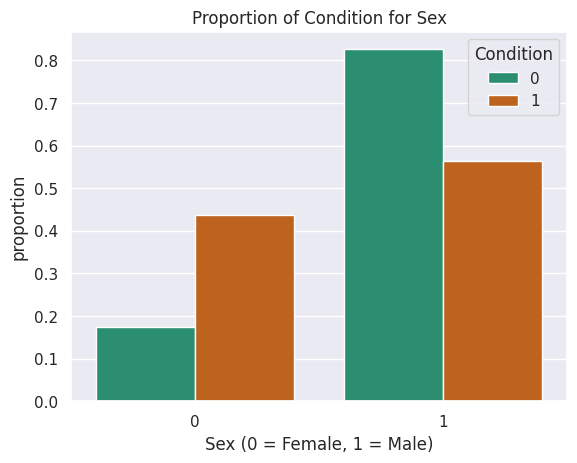

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [ ]:
def condition_proportion_sex(data):

    # Bivariate analysis: Sex vs. Condition
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()


    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')


condition_proportion_sex(df);

#### <u>Sex v. Condition</u>
As expected the males are still more likely to have heart disease even if we factor in conditions.

In [ ]:
def heart_functions1_1(data):

    results = data['Resting_ecg'].value_counts()
    values = [results[0], results[1], results[2]]
    labels = ['Normal (0)', 'Abnormal ST_slope (1)', 'Ventricular hypertrophy (2)']
    colors = ['lime', 'orange', 'red']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}}, title = 'Resting electrocardiographic results')
    py.iplot([fig_pie])
    return py

heart_functions1_1(df);

In [ ]:
def heart_functions1_2(data):

    results = data['ST_slope'].value_counts()
    values = [results[0], results[1], results[2]]
    labels = ['Upslope (0)', 'Horizontal slope (1)', 'Downslope (2)']
    colors = ['lime', 'orange', 'red']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}}, title = 'The slope of the peak exercise ST segment')
    py.iplot([fig_pie])
    return py

heart_functions1_2(df);

### <u>Observations</u>

#### <u>Resting electrocardiographic results</u>

Visualising these results, its clear that a very minimal amount of people had ventricular hypertrophy (2) which is when the heart's left pumping chamber that has thickened and may not be pumping efficiently, when comparing this to the condition my hypothesis is that we may see a link.

However around half of the people had an abnormal ST-T wave (1), and just under half didn't experience any abnormal activity at all (0).

#### <u>ST slope results</u>

When looking at these results, it appears to have very few people who had an upsloping ST-slope (0) at around 20 people. Whereas 140 people had a horizontal ST-Slope (1), and just over 140 people had a downsloping ST_Slope (2). So the vast majority of people had an abnormal ST-Slope.

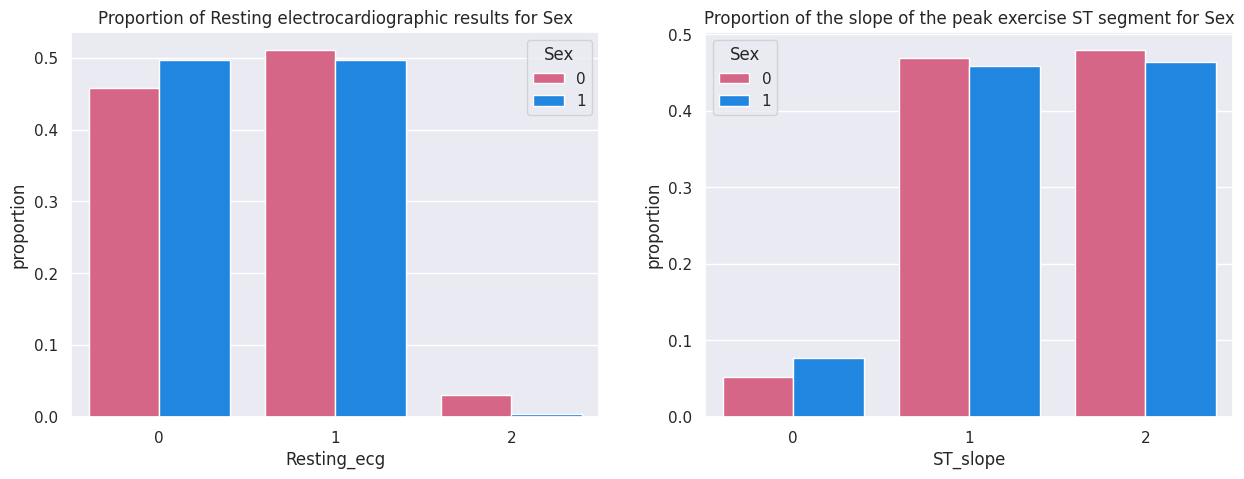

In [ ]:
def heart_functions_sex(data):

    plt.figure(figsize=(15, 5))
    colors = ['#e75480', '#0088FF']

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette=colors)
    plt.title('Proportion of Resting electrocardiographic results for Sex')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette=colors)
    plt.title('Proportion of the slope of the peak exercise ST segment for Sex')
    plt.show()


heart_functions_sex(df);

### <u>Observations</u>

In this case we're measuring as a proportion because there are more men than woman which means it wouldn't be a good representation as to what gender is more common for each type, this will carry on for when we compare to the condition.

#### <u>Proportion of Resting electrocardiographic results for Sex results</u>

Overall, the proportions were very even for both the normal (0) and abnormal ST-T wave (1), with men being slightly higher for normal and woman being slightly higher for abnormal. However, ventricular hypertrophy (2) had a far greater proportion for woman than men.

#### <u>Proportion of the ST_Slope for Sex results</u>

The proportions for the ST-Slope were very similar across all types of slope, with it being slightly higher for men for an upslope (0), and slightly for woman for a horzontal slope (1) and downslope (2).

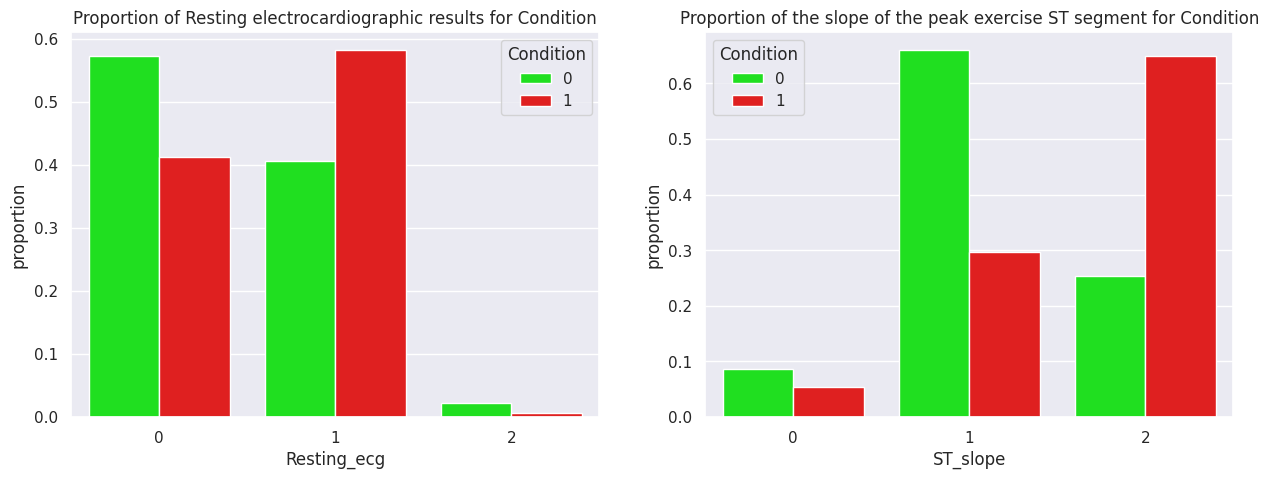

In [ ]:
def heart_functions_sex(data):

    plt.figure(figsize=(15, 5))
    colors = ['lime', 'red']

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette=colors)
    plt.title('Proportion of Resting electrocardiographic results for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette=colors)
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()


heart_functions_sex(df);

### <u>Observations</u>

#### <u>Proportion of Resting electrocardiographic for condition results</u>

When comparing the results to the condition, its clear that the majority with a normal ST-T wave (0) did not suffer from heart disease. However just over 40% did, which suggests that there isn't too much of a link and you still have a good chance of a getting heart disease even when having a normal ST-T wave (0). The abnormal ST-T wave (1) is just as expected with a high proportion of people who experienced heart disease but also around 40% who didn't. However, my ventricular hypertrophy (2) hypothesis was that the proportion would be way higher for people who experienced heart disease than not but its quite the opposite with nearly nobody getting heart diease.

#### <u>Proportion of the ST Slope for condition results</u>

Most people with an ST-Slope that was upslope (0) didn't end up getting heart disease, but there were some that managed to get it. However, a very high proportion that had a horizontal slope (1) didn't get heart disease which is unusual since a horizontal slope (1) is abnormal behaviour. Finally, a very high proportion had heart disease who had a downslope (2) which is in line with what is expected.

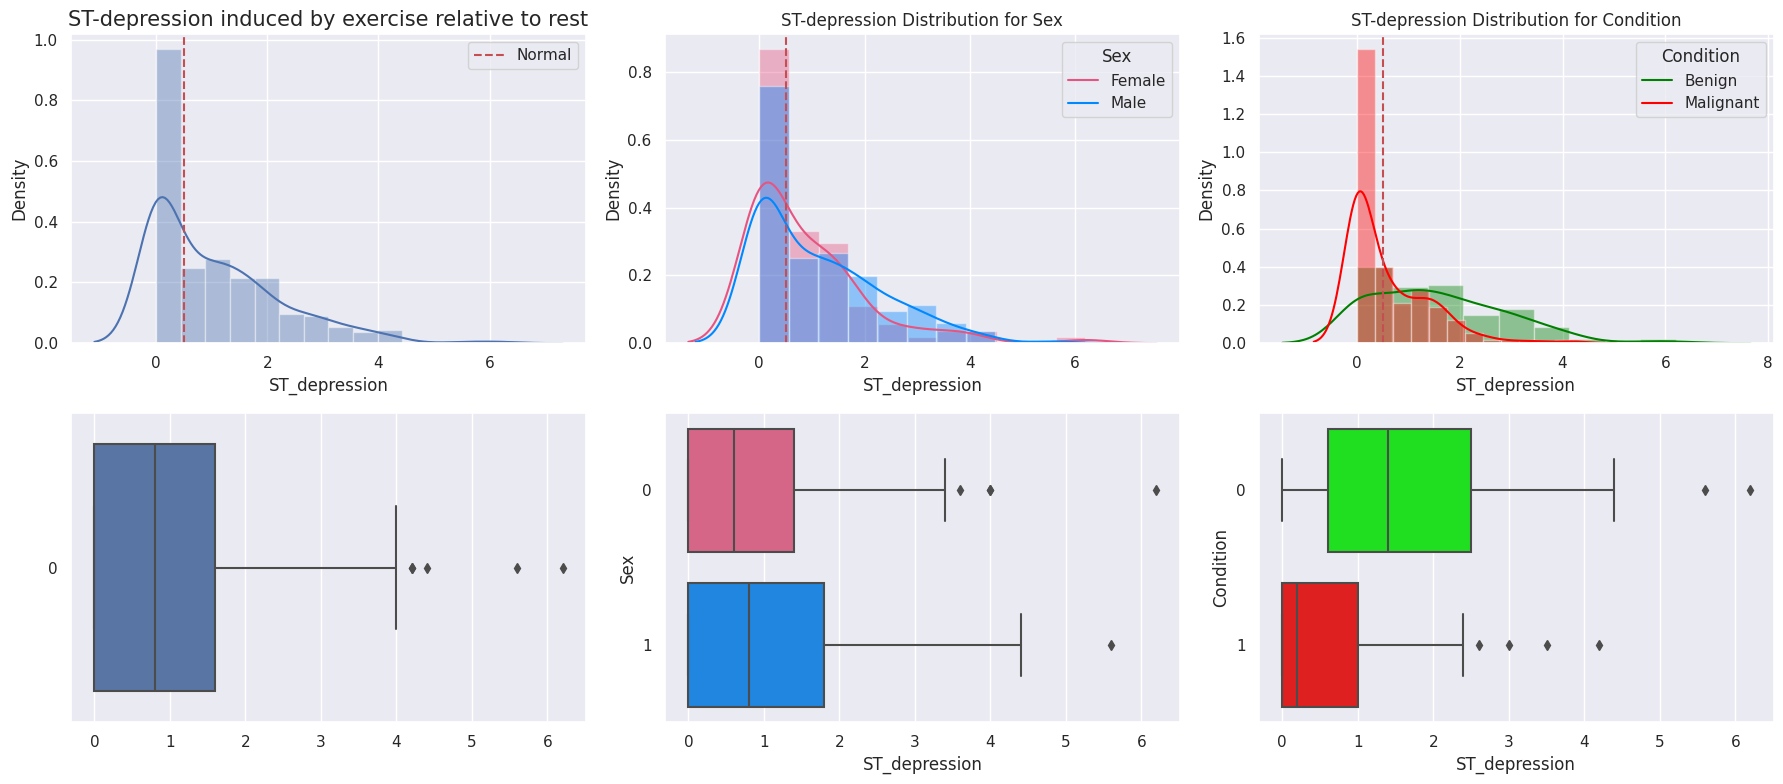

In [ ]:
def heart_functions_sex(data):

    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['ST_depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.distplot(chol_female, color='#e75480')
    sns.distplot(chol_male, color='#0088FF')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette=['#e75480', '#0088FF'], orient='h')


    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.distplot(thalach_b, color='Green')
    sns.distplot(thalach_m, color='Red')
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign','Malignant'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette=['lime', 'red'], orient='h')

    plt.tight_layout()
    plt.show()


heart_functions_sex(df);

### <u>Observations</u>

The ST_depressions highest density is less than 0.5 which is normal, then theres a big drop off in density up to 2, then another drop off after that. The box plot shows that the ST_depression is widly distributed, but has a few outliers.

When comparing the ST_depression to the sex, you can see that there is a higher density of females around the healthier range, and males have a higher density around the more unhealthy range. You can also see that the box plot has a smaller median for females than makes which suggests that females have a healthier ST_depression. Females had more outliers than males.

When comparing the ST_depression to the condition, it is clear that it doesn't affect heart disease very much, as Benign is widly distributed and Malignant has a tight distribution around the healthier range.

In [ ]:
def heart_functions2_1(data):

    results = data['Num_major_vessels'].value_counts()
    values = [results[0], results[1], results[2], results[3], results[4]]
    labels = ['0', '1', '2', '3', '4']
    colors = ['MediumSeaGreen', 'Coral'][[-]]

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}}, title = 'Number of major vessels colored by flourosopy')
    py.iplot([fig_pie])
    return py

heart_functions2_1(df);

In [ ]:
def heart_functions2_2(data):

    results = data['Thallium_test'].value_counts()
    values = [results[0], results[1], results[2], results[3]]
    labels = ['0', '1', '2', '3']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}}, title = 'Thallium scintigraphy')
    py.iplot([fig_pie])
    return py

heart_functions2_2(df);

### <u>Observations</u>

#### <u>Num_major_vessels</u>

Close to 60% had no clots at all, and everyone else had at least 1 clot with 1 being the most common after 0.

#### <u>Thallium_test</u>

0 and 1 were very uncommon, whereas 2 was by far the most populated (54.8%), then followed by 3 (38.6%).

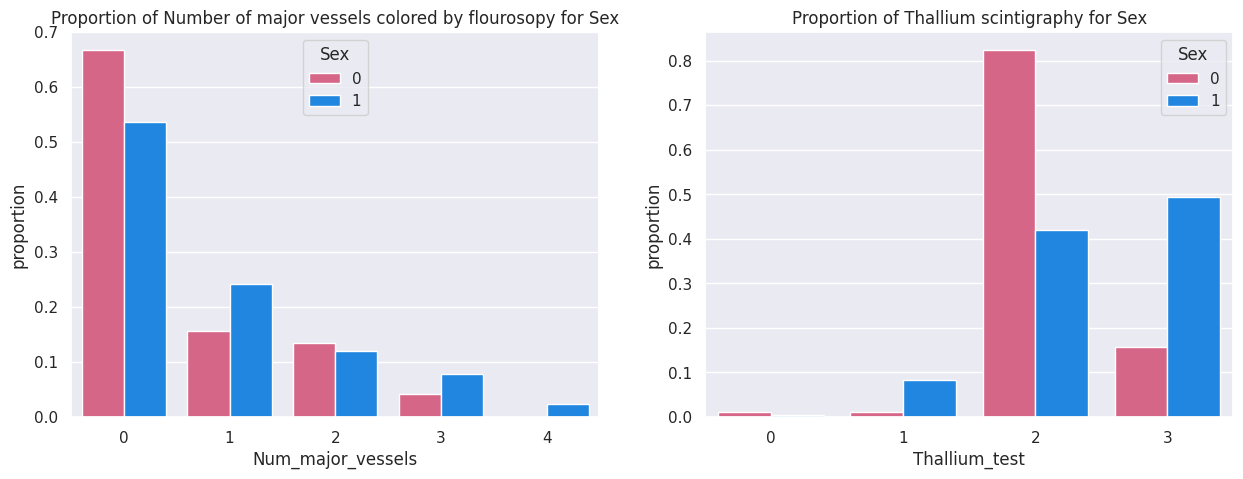

In [ ]:
def heart_functions2_sex(data):

    plt.figure(figsize=(15, 5))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette=['#e75480', '#0088FF'])
    plt.title('Proportion of Number of major vessels colored by flourosopy for Sex')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette=['#e75480', '#0088FF'])
    plt.title('Proportion of Thallium scintigraphy for Sex')
    plt.show()


heart_functions2_sex(df);

### <u>Observations</u>

#### <u>Num_major_vessels</u>

The proportions were fairly similar for both male and female, with female being having a slightly higher proportion for 0 slots, and males being slightly higher for most bars showing 1 or more clots, and only males experienced 4 clots.

#### <u>Thallium_test</u>

Females proved to be much more common at 2 whereas men were more common at 3.

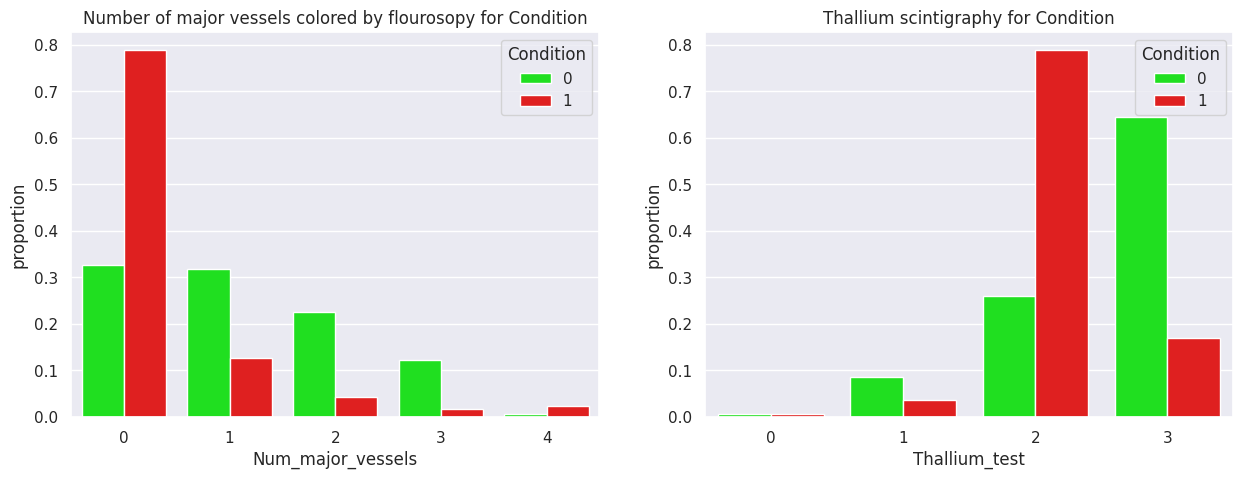

In [ ]:
def heart_functions2_condition(data):

    plt.figure(figsize=(15, 5))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette=['lime', 'red'])
    plt.title('Number of major vessels colored by flourosopy for Condition')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette=['lime', 'red'])
    plt.title('Thallium scintigraphy for Condition')
    plt.show()


heart_functions2_condition(df);

### <u>Observations</u>

#### <u>Num_major_vessels</u>

The highest proportion of people who had heart disease didn't have any clots which suggests that this wasn't one of the main factors in these people getting heart disease.

#### <u>Thallium_test</u>

A very high proportion of people who had heart disease were 2, whereas a high proportion of people who didn't have heart disease were 3. This suggests that this doesn't contribute too much to if people will get heart disease.

[#1] Kaggle, "Heart Disease - Exploratory Data Analysis",   December, 2021. [Online]. Available:
https://www.kaggle.com/code/microvision/heart-disease-exploratory-data-analysis/notebook [Accessed Oct. 27, 2023 - Nov. 24, 2023].